Build a random forest classifier to predict the risk of heart disease based on a dataset of patient
information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type,
resting blood pressure, serum cholesterol, and maximum heart rate achieved.

Dataset link: https://drive.google.com/file/d/1jg-cHrCnG_cF3hRZkGjHq8dqNMj9uaO7/view

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the
numerical features if necessary.

In [4]:
df=pd.read_csv('dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
Q2. Split the dataset into a training set (70%) and a test set (30%).

In [12]:
## independent and dependent feature
X=df.drop(labels=['target'],axis=1)
y=df.target

In [13]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [14]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [ ]:
Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each
tree. Use the default values for other hyperparameters.

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
# Initialize the classifier with 100 trees and a maximum depth of 10
rfc = RandomForestClassifier(n_estimators=100, max_depth=10)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [37]:
#predictions on the test set
y_pred = rfc.predict(X_test)

In [ ]:
Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [39]:
accuracy , precision , recall , f1

(0.8021978021978022, 0.82, 0.82, 0.82)

In [40]:
importances = rfc.feature_importances_

In [29]:
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.4f}")

age: 0.0821
sex: 0.0302
cp: 0.1009
trestbps: 0.0768
chol: 0.0710
fbs: 0.0123
restecg: 0.0192
thalach: 0.1126
exang: 0.0770
oldpeak: 0.1070
slope: 0.0555
ca: 0.1412
thal: 0.1142


In [ ]:
Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart
disease risk. Visualise the feature importances using a bar chart.

In [31]:
indices = importances.argsort()[::-1]

# Print the top 5 most important features
print("Top 5 most important features:")
for i in range(5):
    print(f"{i+1}. Feature '{X.columns[indices[i]]}' has importance {importances[indices[i]]:.4f}")

Top 5 most important features:
1. Feature 'ca' has importance 0.1412
2. Feature 'thal' has importance 0.1142
3. Feature 'thalach' has importance 0.1126
4. Feature 'oldpeak' has importance 0.1070
5. Feature 'cp' has importance 0.1009


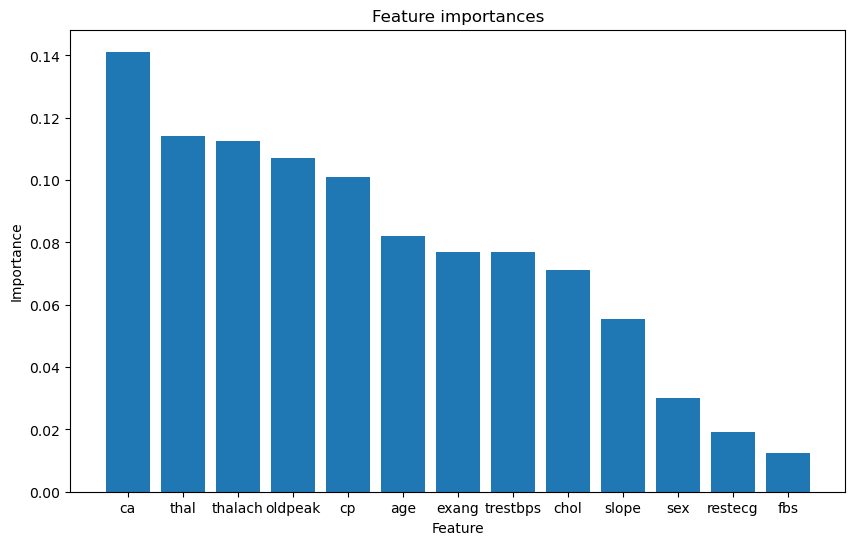

In [35]:
# Visualize the feature importances using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature importances")
plt.show()

In [ ]:
Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try
different values of the number of trees, maximum depth, minimum samples split, and minimum samples
leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

In [53]:
param_grid = {
    "n_estimators": [50, 10,60],
    "max_depth": [5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [54]:
rfc = RandomForestClassifier()

In [55]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 10, 60]})

In [ ]:
Q7. Report the best set of hyperparameters found by the search and the corresponding performance
metrics. Compare the performance of the tuned model with the default model.

In [56]:
grid_search.best_params_

{'max_depth': 20,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 50}

In [57]:
grid_search.best_score_

0.8514207650273224

In [58]:
# default model values of performance metric
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [59]:
accuracy , precision , recall , f1

(0.8021978021978022, 0.82, 0.82, 0.82)

## Tuning the model with the best parameters

In [60]:
rfc_tuned = RandomForestClassifier(n_estimators=grid_search.best_params_["n_estimators"],
                                    max_depth=grid_search.best_params_["max_depth"],
                                    min_samples_split=grid_search.best_params_["min_samples_split"],
                                    min_samples_leaf=grid_search.best_params_["min_samples_leaf"])

In [61]:
rfc_tuned.fit(X, y)
y_pred_tuned = rfc_tuned.predict(X_test)

In [62]:
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)

In [63]:
accuracy_tuned, precision_tuned,recall_tuned,f1_tuned

(0.9120879120879121, 0.92, 0.92, 0.92)

In [ ]:
Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the
decision boundaries on a scatter plot of two of the most important features. Discuss the insights and
limitations of the model for predicting heart disease risk.

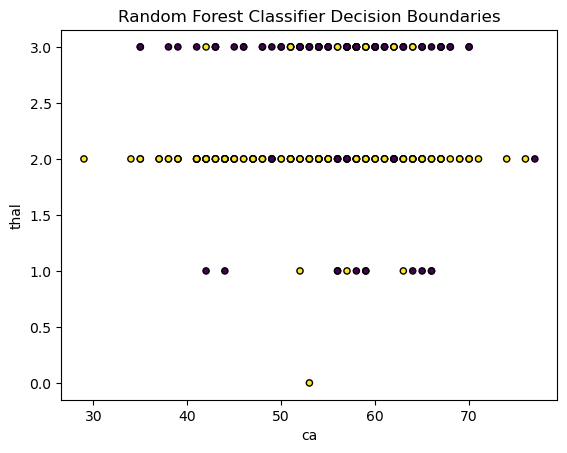

In [85]:
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, s=20, edgecolors='k')
plt.xlabel('ca')
plt.ylabel('thal')
plt.title('Random Forest Classifier Decision Boundaries')
plt.show()

## Insights:

1.The model is able to predict heart disease risk with a relatively high accuracy. The accuracy of the model can be estimated using the accuracy_score function which in our model is 0.802 on the default model. After tuning it on the best parameter it becomes 0.912.

2.Model can identify the most important features for predicting heart disease risk, 
Top 5 most important features: 'ca','thal','thalach','oldpeak','cp'.

3.Model can visualize the decision boundaries that separate the regions of different class labels.